# Machine Learning & Statistics Project 2020
By Kevin Dooley

In [1]:
## import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

#### Load Dataset
To be able to give an overview of the dataset, I had to first obtain it. Copied and saved the dataset from Moodle as a CSV file in my repository. This was saved as powerproduction.csv and was the basis of the project.

In [2]:
df = pd.read_csv("powerproduction.csv") #read the csv file using pandas
df # called the dataset df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
print("Rows x Columns:", df.shape)

Rows x Columns: (500, 2)


The powerproduction.csv has two variables: speed and power. There are also 500 rows in the dataset.

In [4]:
# glance at data - show first 5 rows
df.head()


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
# glance at data - show last 5 rows
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [6]:
# glance at data - show 15 rows
df.sample(15)

,speed,power
103,5.455,4.454
378,18.919,89.047
404,20.095,0.000
8,0.501,1.048
308,15.666,86.288
15,0.726,0.000
79,3.979,2.030
140,7.107,0.000
382,19.069,100.287
26,1.076,0.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


By using these simple functions it is easy to do a overview comparision for both variables of the dataset. These functions do not really tell us much information but they do familarise us with the dataset. The first observation to make from the above is that there appears to be a power output of 0 when in fact there was substantial windspeed. This will need to be investigated further but you could make a reasonable assumption that there was an issue or downtime during these periods. 

In [8]:
#describe function to show statistical summary of the dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The statistical summary above gives us a top level look at the dataset. It can be seen that that the average wind speed is 12.59 and the average power output is 48.01.

### Plot Dataset

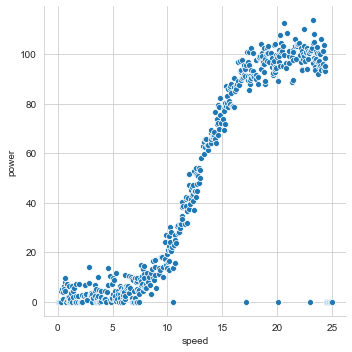

In [9]:
# https://seaborn.pydata.org/generated/seaborn.relplot.html
sns.set_style('whitegrid')
sns.relplot(x="speed", y="power",data=df)


Text(0.5, 1.0, 'Wind Speed vs Generated Power ')

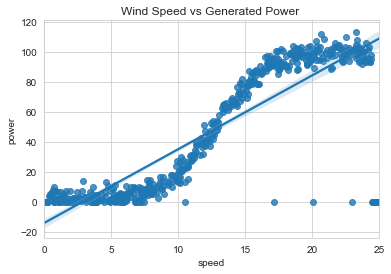

In [10]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=df)
reg.set_title("Wind Speed vs Generated Power ")

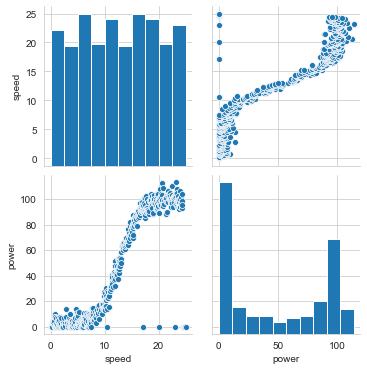

In [11]:
sns.pairplot(df)

The above relationship plots are clearing indicating that there are some outliers in the dataset. As mentioned above, the values for power generated are 0 when the wind speed is up to 25 which indicates there was downtime either due to a known/unknown issue or maintenance. 

In [12]:
# adapted from https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
# remove unexpected zeros from dataset as these will zeros will make our modelling less accurate
# show values not equal 0
zero_removed = df[(df["speed"]!=0) & (df["power"]!=0)]
zero_removed


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [13]:
# missing first zero of dataset
#need to incorporate as it is correct - 0 wind speed will give 0 output
zero_included = df[(df["speed"]==0) & (df["power"]==0)]
#zero_included

new_df = zero_included.append(zero_removed)
dataset_clean = new_df #new dataframe with zero added at the start 

Text(0.5, 1.0, 'Wind Speed vs Generated Power - Clean')

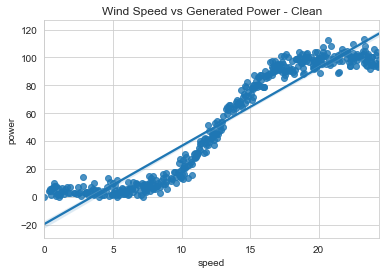

In [14]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=new_df)
reg.set_title("Wind Speed vs Generated Power - Clean")

The unexpected zero results have now been removed from the dataset. You can see from both the plot and table above, the 0 datapoints have now been removed. 

## Linear Regression

The powerproduction dataset is suitable for a regression model. Based on the plots above, it appears that a linear regression could work but may no tbe the best fit, possibly polynomial fit would be better. Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). [4] Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). Basically that y can be calculated from a linear combination of the input variables (x). [5] In this instance, wind speed in the (x) input and power the (y) output variable. 

In [15]:
#lecture - link to repo
#create linear model instance
# adapted from https://realpython.com/linear-regression-in-python/
m = lm.LinearRegression()

In [16]:
#create x & y
x = dataset_clean["speed"]
y = dataset_clean["power"]

# x must be 2 dimensional. .reshape(-1,1) changes x to 2 dimensional (single column)
x = x.values.reshape(-1, 1)

#model to fit data
reg_model = m.fit(x,y)
reg_model

LinearRegression()

In [17]:
#intercept
m.intercept_

-19.636232996770858

In [18]:
#coefficient
m.coef_

array([5.60668469])

In [19]:
#how good is the model
m.score(x,y)

0.8983450728341917

In [20]:
#predict
predict = reg_model.predict(x)
predict

array([-19.636233  , -17.81406047, -17.39355912, -17.11322489,
       -16.82728397, -16.68711685, -16.54694973, -16.40678261,
       -16.12644838, -15.84611415, -15.70594703, -15.14527856,
       -15.00511144, -14.86494432, -14.44444297, -14.30427586,
       -14.16410874, -14.02394162, -13.74360739, -13.46327315,
       -13.18293892, -12.62227045, -12.48210333, -11.78126774,
       -11.64110063, -11.21499259, -10.37398989, -10.09365565,
        -9.11248583,  -8.97231871,  -7.43048042,  -7.15014619,
        -6.16897637,  -5.74847502,  -5.32236698,  -5.18219986,
        -4.48136428,  -3.78052869,  -3.64036157,  -3.0796931 ,
        -2.79935887,  -2.65919175,  -2.51902463,  -2.37885752,
        -1.67802193,  -0.69685211,  -0.55668499,  -0.41651787,
         0.14975728,   0.57025863,   0.71042575,   1.1309271 ,
         1.27109422,   2.25226404,   2.39243116,   2.53259827,
         2.67276539,   3.79410233,   4.49493792,   4.63510503,
         5.76204866,   5.90221577,   6.18255001,   6.88

In [43]:
#get y predict calculated manually
pred = m.intercept_ + m.coef_ * x
pred

array([-19.636233  , -17.81406047, -17.39355912, -17.11322489,
       -16.82728397, -16.68711685, -16.54694973, -16.40678261,
       -16.12644838, -15.84611415, -15.70594703, -15.14527856,
       -15.00511144, -14.86494432, -14.44444297, -14.30427586,
       -14.16410874, -14.02394162, -13.74360739, -13.46327315,
       -13.18293892, -12.62227045, -12.48210333, -11.78126774,
       -11.64110063, -11.21499259, -10.37398989, -10.09365565,
        -9.11248583,  -8.97231871,  -7.43048042,  -7.15014619,
        -6.16897637,  -5.74847502,  -5.32236698,  -5.18219986,
        -4.48136428,  -3.78052869,  -3.64036157,  -3.0796931 ,
        -2.79935887,  -2.65919175,  -2.51902463,  -2.37885752,
        -1.67802193,  -0.69685211,  -0.55668499,  -0.41651787,
         0.14975728,   0.57025863,   0.71042575,   1.1309271 ,
         1.27109422,   2.25226404,   2.39243116,   2.53259827,
         2.67276539,   3.79410233,   4.49493792,   4.63510503,
         5.76204866,   5.90221577,   6.18255001,   6.88

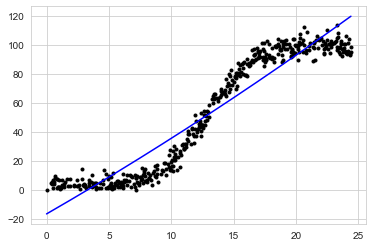

In [22]:
#link to repo lecture notes
x = dataset_clean["speed"].to_numpy()
y = dataset_clean["power"].to_numpy()

a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'b-');

In [48]:
# compare actual vs predicted power
compare = pd.DataFrame({'Actual Power': y, 'Predicted Power': predict})
compare

,Actual Power,Predicted Power
0,0.000,-19.636233
1,4.331,-17.814060
2,5.186,-17.393559
3,3.826,-17.113225
4,1.048,-16.827284
...,...,...
447,103.700,116.320264
448,93.694,116.600598
449,93.078,116.880933
450,98.223,117.021100


### References

1. https://github.com/kevindooley/fundamentals-data-analysis-project/blob/master/tips_dataset.ipynb
2. https://seaborn.pydata.org/generated/seaborn.relplot.html
3. https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
4. wiki
5. https://machinelearningmastery.com/linear-regression-for-machine-learning/
6. https://realpython.com/linear-regression-in-python/